In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [289]:
df=pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [290]:
df.shape

(10861, 17)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [292]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [293]:
#Handling missing values

In [294]:
df.isnull().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


In [295]:
#  fill missing values in categorical columns job,education,loan,contact

df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)


In [296]:
#  fill missing values in numerical columns balance,duration,Pdays

df['balance'].fillna(df['balance'].median(), inplace=True)
df['duration'].fillna(df['duration'].median(), inplace=True)
df['day'].fillna(df['day'].mode()[0], inplace=True)


In [297]:
df['pdays'].unique()

array([ -1.,  nan, 166.,  91., 143., 147., 170., 104., 150., 171., 126.,
       182., 127., 110., 168., 100., 198., 174., 175., 195., 111.,  27.,
       128., 177., 167., 122., 183., 133., 178.,  34.,  10., 163., 135.,
       184., 154.,  99.,  93., 253.,   2., 242., 272., 208.,  73.,  76.,
       269., 160.,  90., 196., 189., 246., 238., 203., 268., 267., 251.,
        92., 262.,   9.,  88.,  85., 243., 210., 200., 257., 264., 101.,
       261., 102., 270., 107., 106., 199., 112.,  41., 294., 121., 231.,
       130., 239., 302., 307., 222., 138., 323., 141., 320., 316., 140.,
       315., 256., 146., 328.,  74., 148., 327., 341., 330., 145., 266.,
       234., 345., 318., 305., 325., 274., 343.,  57., 260., 329., 344.,
       254., 180., 340.,  82., 181., 278., 153.,  81.,   4., 349., 334.,
        87., 176.,  86., 169.,  83.,  79.,   6., 259.,  13., 161., 350.,
        84.,  80., 164., 162.,  22., 296.,  66., 263., 333.,  17.,  89.,
       319.,  78., 286., 337., 364., 188., 258., 35

In [298]:
df['pdays'].value_counts()

,count
pdays,
-1.0,8937
92.0,96
182.0,80
91.0,75
181.0,74
...,...
201.0,1
230.0,1
310.0,1


The pdays column represents the number of days that have passed since the customer was last contacted in a previous campaign. **The value -1** is a special indicator, often used to signify that the customer was never contacted before.

since -1 is the most frequent value,we  can use mode imputation, replacing missing values with -1

In [299]:
df['pdays'].fillna(df['pdays'].mode()[0], inplace=True)


In [300]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [301]:
#  seperate X and Y(target variable)

X = df.drop('y', axis=1)
y = df['y']


In [302]:
#  map values in y

y = y.map({'no':0, 'yes':1})


In [303]:
#  create a dataframe with categorical variables
cat_df = X.select_dtypes(include=['object'])
cat_df.nunique()


,0
job,12
marital,3
education,4
default,2
housing,2
loan,2
contact,3
month,12
poutcome,4


In [304]:
#  print unique values in each columns in cat_df

for col in cat_df.columns:
  print(f"Unique values in column '{col}': {cat_df[col].unique()}")


Unique values in column 'job': ['admin.' 'technician' 'services' 'management' 'retired' 'unemployed'
 'blue-collar' 'entrepreneur' 'housemaid' 'self-employed' 'unknown'
 'student']
Unique values in column 'marital': ['married' 'single' 'divorced']
Unique values in column 'education': ['secondary' 'tertiary' 'unknown' 'primary']
Unique values in column 'default': ['no' 'yes']
Unique values in column 'housing': ['yes' 'no']
Unique values in column 'loan': ['no' 'yes']
Unique values in column 'contact': ['unknown' 'cellular' 'telephone']
Unique values in column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in column 'poutcome': ['unknown' 'other' 'failure' 'success']


In [305]:
#  do label encoding to column education and one hot encoding to other columns in cat_df

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for 'education' (since it's ordinal)
label_encoder = LabelEncoder()
X['education'] = label_encoder.fit_transform(X['education'])

# One-Hot Encoding for other categorical columns
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(cat_df.drop('education', axis=1)).toarray())
ohe_df.columns = ohe.get_feature_names_out(cat_df.drop('education', axis=1).columns)

# Concatenate encoded columns with numerical columns
X_encoded = pd.concat([X.select_dtypes(exclude=['object']), ohe_df], axis=1)
X_encoded

,age,education,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,2343.0,5.0,1042.0,1,-1.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,1,45.0,5.0,1467.0,1,-1.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1,1270.0,5.0,1389.0,1,-1.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,1,2476.0,5.0,579.0,1,-1.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,2,184.0,5.0,673.0,2,-1.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10856,45,0,413.0,30.0,65.0,1,-1.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10857,51,1,4178.0,30.0,556.0,1,-1.0,0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10858,40,2,2147.0,30.0,115.0,1,-1.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10859,43,1,1096.0,30.0,180.0,1,-1.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [306]:
#  take out numerical columns and create a dataframe num_df

num_df = X.select_dtypes(include=['int64', 'float64'])
num_df.head()

,age,education,balance,day,duration,campaign,pdays,previous
0,59,1,2343.0,5.0,1042.0,1,-1.0,0
1,56,1,45.0,5.0,1467.0,1,-1.0,0
2,41,1,1270.0,5.0,1389.0,1,-1.0,0
3,55,1,2476.0,5.0,579.0,1,-1.0,0
4,54,2,184.0,5.0,673.0,2,-1.0,0


In [307]:
#  remove column education from num_df

num_df = num_df.drop('education', axis=1)


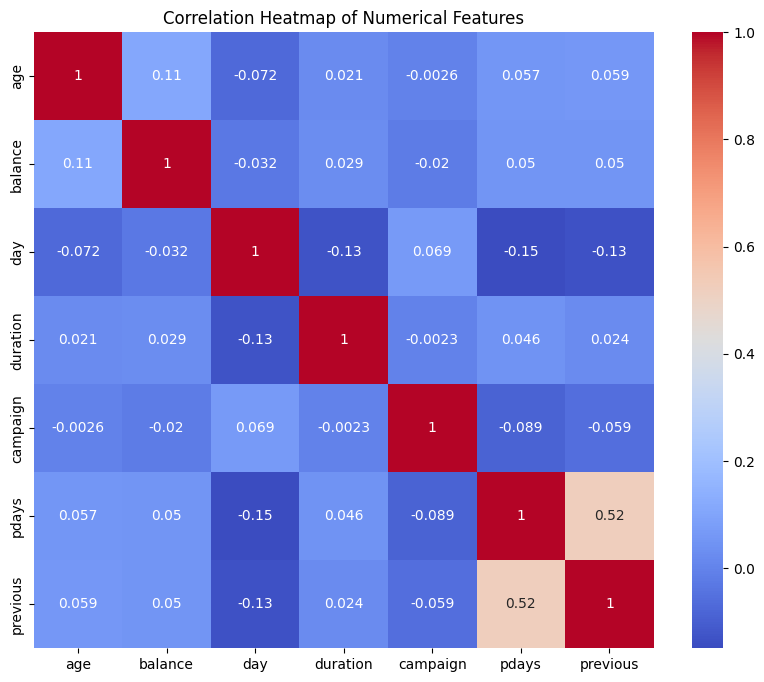

In [308]:
#  correlation heatmap of num_df

plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [309]:
y

,y
0,1
1,1
2,1
3,1
4,1
...,...
10856,0
10857,0
10858,0
10859,0


In [310]:
y.dtypes

dtype('int64')

In [311]:
#  concat X and y to dataframe Z, for finding correlation with pdays and previous with y

Z = pd.concat([X, y], axis=1)
Z.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,1,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,1
1,56,admin.,married,1,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,1
2,41,technician,married,1,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,1
3,55,services,married,1,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,1
4,54,admin.,married,2,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,1


In [312]:
#  correlation between pdays,previous and target variable

# Calculate correlations with the target variable
correlations = Z[['pdays', 'previous', 'y']].corr()['y']

print(correlations)


pdays       0.387396
previous    0.311960
y           1.000000
Name: y, dtype: float64


In [313]:
#  drop column previous

X_encoded = X_encoded.drop('previous', axis=1)
X_encoded.head()

,age,education,balance,day,duration,campaign,pdays,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,2343.0,5.0,1042.0,1,-1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,56,1,45.0,5.0,1467.0,1,-1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,41,1,1270.0,5.0,1389.0,1,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,55,1,2476.0,5.0,579.0,1,-1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,54,2,184.0,5.0,673.0,2,-1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [332]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Calculate mutual information scores
mi_scores = mutual_info_classif(X_encoded, y)

# Create a Series to associate features with their scores
mi_scores_series = pd.Series(mi_scores, index=X_encoded.columns)

# Sort features by their mutual information scores in descending order
mi_scores_series.sort_values(ascending=False, inplace=True)

# Print or visualize the ranked features
print(mi_scores_series)

# Select the top k features based on mutual information
k = 12  # Choose the number of features you want to keep
selected_features = mi_scores_series.index[:k]

# Check if selected_features has multiple columns
print(f"Selected Features: {selected_features}")

# Create a new DataFrame with only the selected features
X_reduced = X_encoded.loc[:, selected_features]  # Ensure you select columns properly
X_reduced


contact_unknown      0.528441
month_may            0.455150
contact_cellular     0.452319
day                  0.225755
housing_no           0.169370
housing_yes          0.165495
pdays                0.150681
poutcome_unknown     0.150291
duration             0.136612
poutcome_success     0.065808
balance              0.062236
month_jul            0.052478
month_aug            0.046928
poutcome_failure     0.042288
month_apr            0.038459
month_jun            0.036846
age                  0.036210
month_nov            0.035124
month_feb            0.032372
job_blue-collar      0.025557
month_sep            0.022926
month_oct            0.022859
contact_telephone    0.021873
education            0.021068
poutcome_other       0.017908
month_mar            0.014600
job_student          0.014503
job_retired          0.014312
job_management       0.013466
month_jan            0.012466
loan_yes             0.008703
marital_divorced     0.007596
job_services         0.006364
job_techni

,contact_unknown,month_may,contact_cellular,day,housing_no,housing_yes,pdays,poutcome_unknown,duration,poutcome_success,balance,month_jul
0,1.0,1.0,0.0,5.0,0.0,1.0,-1.0,1.0,1042.0,0.0,2343.0,0.0
1,1.0,1.0,0.0,5.0,1.0,0.0,-1.0,1.0,1467.0,0.0,45.0,0.0
2,1.0,1.0,0.0,5.0,0.0,1.0,-1.0,1.0,1389.0,0.0,1270.0,0.0
3,1.0,1.0,0.0,5.0,0.0,1.0,-1.0,1.0,579.0,0.0,2476.0,0.0
4,1.0,1.0,0.0,5.0,1.0,0.0,-1.0,1.0,673.0,0.0,184.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10856,1.0,1.0,0.0,30.0,0.0,1.0,-1.0,1.0,65.0,0.0,413.0,0.0
10857,1.0,1.0,0.0,30.0,0.0,1.0,-1.0,1.0,556.0,0.0,4178.0,0.0
10858,1.0,1.0,0.0,30.0,0.0,1.0,-1.0,1.0,115.0,0.0,2147.0,0.0
10859,1.0,1.0,0.0,30.0,1.0,0.0,-1.0,1.0,180.0,0.0,1096.0,0.0


In [315]:
#  convert X_reduced to a dataframe

X_reduced_df = pd.DataFrame(X_reduced)
X_reduced_df

,contact_unknown,month_may,contact_cellular,day,housing_yes,housing_no,pdays,poutcome_unknown
0,1.0,1.0,0.0,5.0,1.0,0.0,-1.0,1.0
1,1.0,1.0,0.0,5.0,0.0,1.0,-1.0,1.0
2,1.0,1.0,0.0,5.0,1.0,0.0,-1.0,1.0
3,1.0,1.0,0.0,5.0,1.0,0.0,-1.0,1.0
4,1.0,1.0,0.0,5.0,0.0,1.0,-1.0,1.0
...,...,...,...,...,...,...,...,...
10856,1.0,1.0,0.0,30.0,1.0,0.0,-1.0,1.0
10857,1.0,1.0,0.0,30.0,1.0,0.0,-1.0,1.0
10858,1.0,1.0,0.0,30.0,1.0,0.0,-1.0,1.0
10859,1.0,1.0,0.0,30.0,0.0,1.0,-1.0,1.0


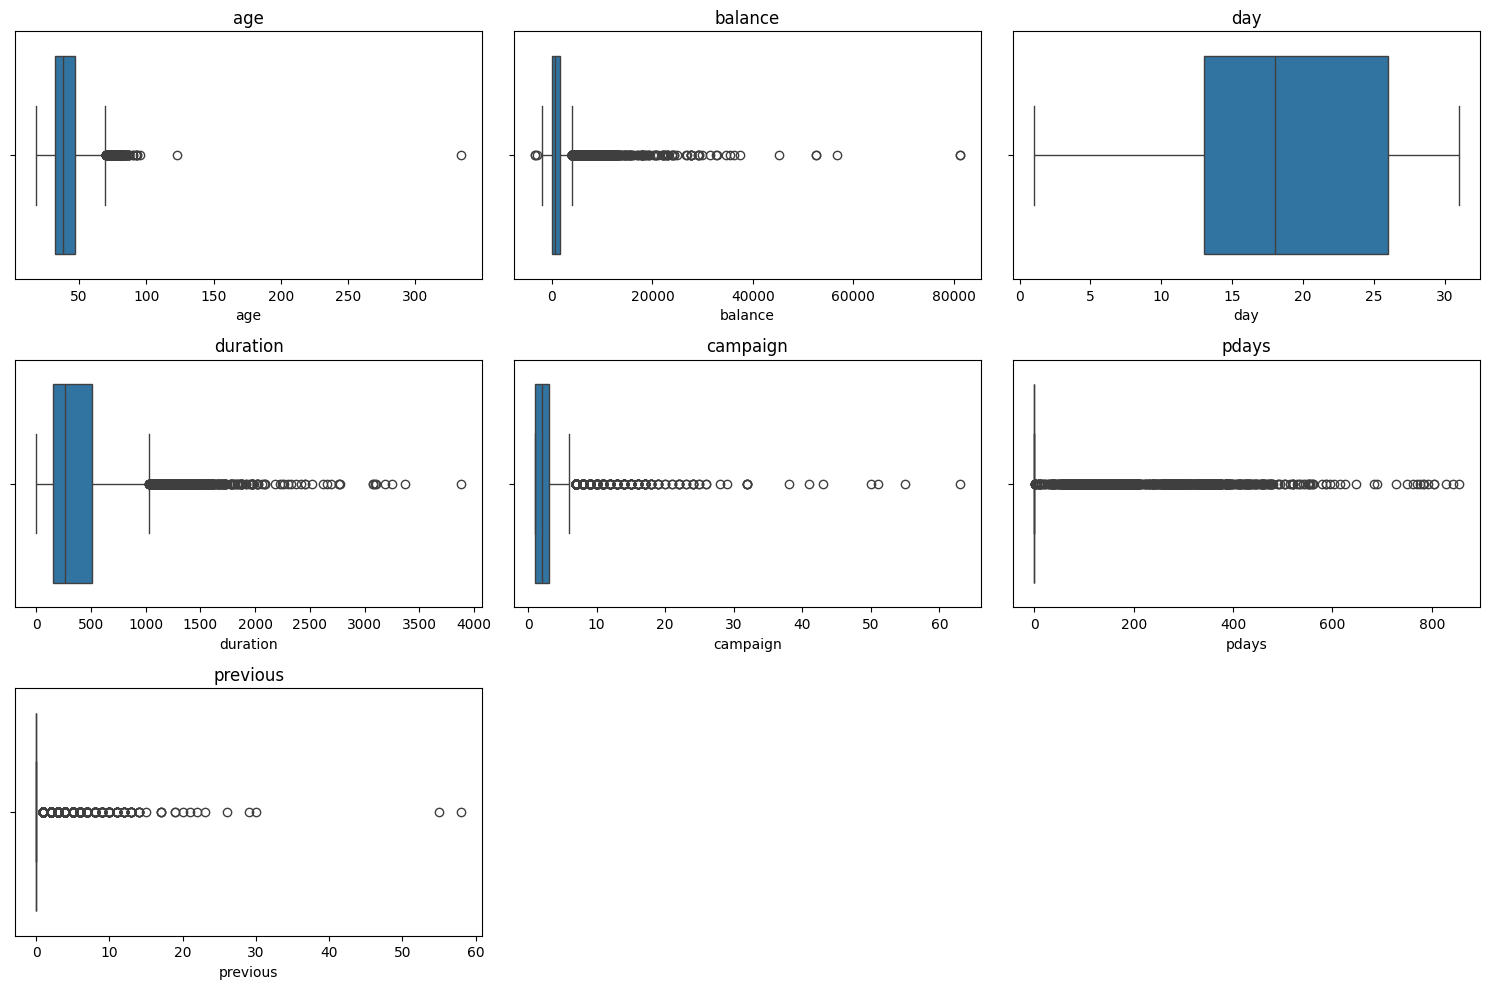

In [316]:
#  outlier detection using boxplot

# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=num_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


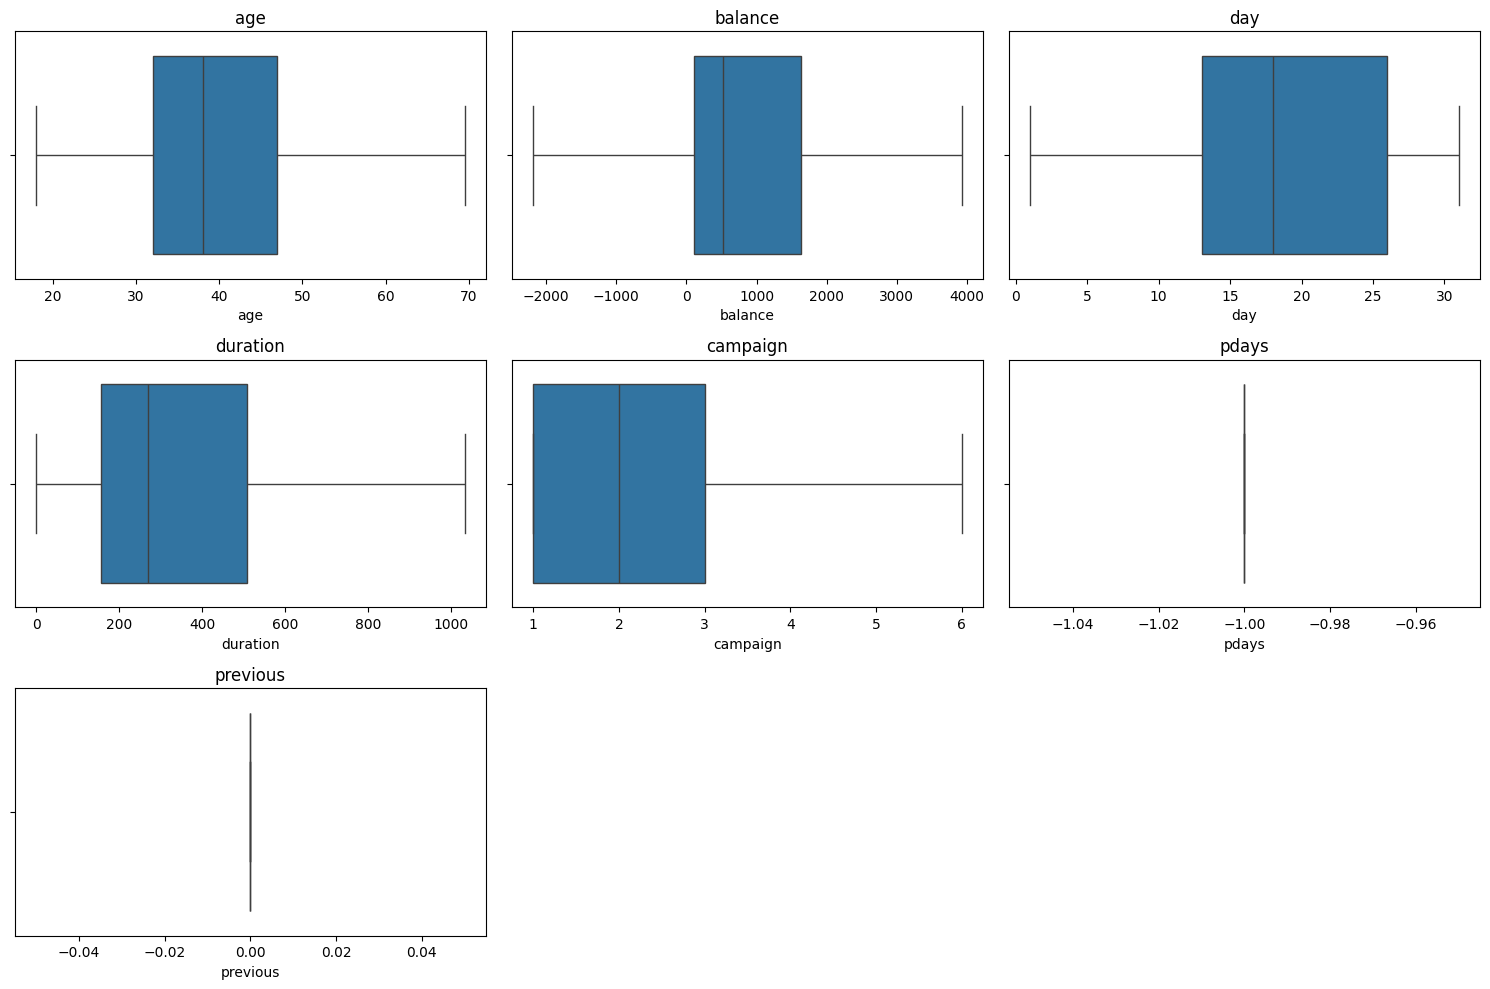

In [317]:
#  do IQR to all numerical columns except day and print boxplot again

for col in num_df.columns:
    if col not in ['day']:
        Q1 = num_df[col].quantile(0.25)
        Q3 = num_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        num_df[col] = np.clip(num_df[col], lower_bound, upper_bound)

# Box plots after IQR treatment
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=num_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [318]:
num_df

,age,balance,day,duration,campaign,pdays,previous
0,59.0,2343.0,5.0,1032.0,1,-1.0,0
1,56.0,45.0,5.0,1032.0,1,-1.0,0
2,41.0,1270.0,5.0,1032.0,1,-1.0,0
3,55.0,2476.0,5.0,579.0,1,-1.0,0
4,54.0,184.0,5.0,673.0,2,-1.0,0
...,...,...,...,...,...,...,...
10856,45.0,413.0,30.0,65.0,1,-1.0,0
10857,51.0,3922.0,30.0,556.0,1,-1.0,0
10858,40.0,2147.0,30.0,115.0,1,-1.0,0
10859,43.0,1096.0,30.0,180.0,1,-1.0,0


In [319]:
#  drop column previous from  num_df

num_df = num_df.drop('previous', axis=1)
num_df


,age,balance,day,duration,campaign,pdays
0,59.0,2343.0,5.0,1032.0,1,-1.0
1,56.0,45.0,5.0,1032.0,1,-1.0
2,41.0,1270.0,5.0,1032.0,1,-1.0
3,55.0,2476.0,5.0,579.0,1,-1.0
4,54.0,184.0,5.0,673.0,2,-1.0
...,...,...,...,...,...,...
10856,45.0,413.0,30.0,65.0,1,-1.0
10857,51.0,3922.0,30.0,556.0,1,-1.0
10858,40.0,2147.0,30.0,115.0,1,-1.0
10859,43.0,1096.0,30.0,180.0,1,-1.0


In [320]:
#  scale numerical columns(num_df), after dropping column 'previous'

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_num_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scaled_num_df


,age,balance,day,duration,campaign,pdays
0,1.688782,0.974387,-1.642654,2.372002,-0.810626,0.0
1,1.420053,-0.774827,-1.642654,2.372002,-0.810626,0.0
2,0.076409,0.157630,-1.642654,2.372002,-0.810626,0.0
3,1.330477,1.075625,-1.642654,0.757485,-0.810626,0.0
4,1.240901,-0.669022,-1.642654,1.092506,-0.134679,0.0
...,...,...,...,...,...,...
10856,0.434714,-0.494709,1.543829,-1.074440,-0.810626,0.0
10857,0.972172,2.176305,1.543829,0.675511,-0.810626,0.0
10858,-0.013167,0.825194,1.543829,-0.896237,-0.810626,0.0
10859,0.255562,0.025183,1.543829,-0.664573,-0.810626,0.0


In [321]:
#  concat  scaled_num_df with X_reduced_df

X = pd.concat([scaled_num_df, X_reduced_df], axis=1)
X.head()


,age,balance,day,duration,campaign,pdays,contact_unknown,month_may,contact_cellular,day,housing_yes,housing_no,pdays,poutcome_unknown
0,1.688782,0.974387,-1.642654,2.372002,-0.810626,0.0,1.0,1.0,0.0,5.0,1.0,0.0,-1.0,1.0
1,1.420053,-0.774827,-1.642654,2.372002,-0.810626,0.0,1.0,1.0,0.0,5.0,0.0,1.0,-1.0,1.0
2,0.076409,0.157630,-1.642654,2.372002,-0.810626,0.0,1.0,1.0,0.0,5.0,1.0,0.0,-1.0,1.0
3,1.330477,1.075625,-1.642654,0.757485,-0.810626,0.0,1.0,1.0,0.0,5.0,1.0,0.0,-1.0,1.0
4,1.240901,-0.669022,-1.642654,1.092506,-0.134679,0.0,1.0,1.0,0.0,5.0,0.0,1.0,-1.0,1.0


In [322]:
X.shape

(10861, 14)

In [323]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'contact_unknown', 'month_may', 'contact_cellular', 'day',
       'housing_yes', 'housing_no', 'pdays', 'poutcome_unknown'],
      dtype='object')

In [324]:
#  do train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


Models

In [325]:
#  do logistic regression modelling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9783709157846295

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1119
           1       0.98      0.98      0.98      1054

    accuracy                           0.98      2173
   macro avg       0.98      0.98      0.98      2173
weighted avg       0.98      0.98      0.98      2173


Confusion Matrix:
 [[1098   21]
 [  26 1028]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [326]:
#  do decision trees

from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dtree))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dtree))
print("\nConfusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dtree))


Accuracy (Decision Tree): 0.9746893695352048

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1119
           1       0.97      0.98      0.97      1054

    accuracy                           0.97      2173
   macro avg       0.97      0.97      0.97      2173
weighted avg       0.97      0.97      0.97      2173


Confusion Matrix (Decision Tree):
 [[1083   36]
 [  19 1035]]


In [327]:
#  do hyper parameter tuning

from sklearn.model_selection import GridSearchCV

# Logistic Regression Hyperparameter Tuning
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best accuracy for Logistic Regression:", grid_search_logreg.best_score_)

# Decision Tree Hyperparameter Tuning
param_grid_dtree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dtree = GridSearchCV(DecisionTreeClassifier(), param_grid_dtree, cv=5, scoring='accuracy')
grid_search_dtree.fit(X_train, y_train)

print("\nBest parameters for Decision Tree:", grid_search_dtree.best_params_)
print("Best accuracy for Decision Tree:", grid_search_dtree.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.9766347809438253

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best accuracy for Decision Tree: 0.9802028284418263


In [328]:
#  grid_search_dtree.best_score_ " convert it into a callable object

# Assuming you want to create a function that returns the best score:
def get_best_dtree_score():
  return grid_search_dtree.best_score_

# Call the function to get the score
best_score = get_best_dtree_score()
print(best_score)


0.9802028284418263


In [329]:
#  do random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))


Accuracy (Random Forest): 0.985734008283479

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1119
           1       0.99      0.98      0.99      1054

    accuracy                           0.99      2173
   macro avg       0.99      0.99      0.99      2173
weighted avg       0.99      0.99      0.99      2173


Confusion Matrix (Random Forest):
 [[1109   10]
 [  21 1033]]


In [330]:
#  create a dataframe with accuracy scores of these models and sort in order

accuracy_scores = {
    'Logistic Regression': grid_search_logreg.best_score_,
    'Decision Tree': grid_search_dtree.best_score_,
    'Random Forest': accuracy_score(y_test, y_pred_rf)
}

accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)
print(accuracy_df)


                     Accuracy
Random Forest        0.985734
Decision Tree        0.980203
Logistic Regression  0.976635


In [333]:
#  do cross validation

from sklearn.model_selection import cross_val_score

# Logistic Regression with Cross-Validation
logreg_cv_scores = cross_val_score(grid_search_logreg.best_estimator_, X, y, cv=5)
print("Logistic Regression CV Scores:", logreg_cv_scores)
print("Mean CV Accuracy (Logistic Regression):", logreg_cv_scores.mean())

# Decision Tree with Cross-Validation
dtree_cv_scores = cross_val_score(grid_search_dtree.best_estimator_, X, y, cv=5)
print("\nDecision Tree CV Scores:", dtree_cv_scores)
print("Mean CV Accuracy (Decision Tree):", dtree_cv_scores.mean())

# Random Forest with Cross-Validation
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
print("\nRandom Forest CV Scores:", rf_cv_scores)
print("Mean CV Accuracy (Random Forest):", rf_cv_scores.mean())


Logistic Regression CV Scores: [0.88127013 0.98618785 0.98895028 0.99263352 0.99309392]
Mean CV Accuracy (Logistic Regression): 0.9684271390300685

Decision Tree CV Scores: [0.88127013 0.95672192 0.96823204 0.97744015 0.95441989]
Mean CV Accuracy (Decision Tree): 0.9476168259545622

Random Forest CV Scores: [0.51633686 0.70257827 0.95856354 0.98480663 0.5359116 ]
Mean CV Accuracy (Random Forest): 0.739639379662847


Summary and Recommendations

    Stability and Performance:
        Logistic Regression has the most stable and high performance across the folds, making it a reliable choice for your data.
        Decision Tree performs well but shows some variability, which suggests it might be overfitting or sensitive to training data changes.
        Random Forest shows the highest variance in performance, which might require further tuning and investigation.

        Model Choice:

    Based on the mean CV accuracies and stability, **Logistic Regression** appears to be the most reliable model for your dataset, followed by Decision Tree. Random Forest might need additional work to stabilize and enhance performance.

In [335]:
# do hyper parameter tuning to logistic regression

# Logistic Regression Hyperparameter Tuning
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best accuracy for Logistic Regression:", grid_search_logreg.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.9765197061452062


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
